In [1]:
import binpacking
import matplotlib.pyplot as plt

# https://towardsdatascience.com/4-steps-to-easily-allocate-resources-with-python-bin-packing-5933fb8e53a9

In [2]:
# Number of desidered equal balanced bins
numberOfBins = 6

# Your dictionary of Resources:
#   - Key: Resource name
#   - Value: Resource contribution value
resources = {
    "A" : 5, "B" : 5, "C" : 3, "D" : 4, 
    "E" : 4, "F" : 1, "G" : 4, "H" : 5, 
    "I" : 4, "L" : 3, "M" : 3, "N" : 4,
    "O" : 3, "P" : 2, "Q" : 3, "R" : 1,
    "S" : 5, "T" : 2, "U" : 5, "V" : 3,
    "Z" : 1,
}

In [13]:
groups = binpacking.to_constant_bin_number(resources, numberOfBins)
# print(groups)


cuts = list(resources.values())
cuts_list = binpacking.to_constant_volume(cuts, 10)
print(cuts_list)

# prints:
# [
#   {'A': 5, 'E': 4, 'Q': 3},
#   {'U': 5, 'G': 4, 'P': 2, 'F': 1},
#   {'B': 5, 'N': 4, 'T': 2, 'R': 1},
#   {'S': 5, 'C': 3, 'L': 3, 'Z': 1},
#   {'H': 5, 'M': 3, 'V': 3},
#   {'I': 4, 'D': 4, 'O': 3}
# ]

[[5, 5], [5, 5], [5, 4, 1], [4, 4, 2], [4, 4, 2], [3, 3, 3, 1], [3, 3, 3, 1]]


In [4]:
resourcesPerGroups = [list(group.keys()) for group in groups]

print(resourcesPerGroups)
# prints
# [
#  ['A', 'E', 'Q'],
#  ['U', 'G', 'P', 'F'],
#  ['B', 'N', 'T', 'R'],
#  ['S', 'C', 'L', 'Z'],
#  ['H', 'M', 'V'],
#  ['I', 'D', 'O']
#]

[['A', 'G', 'V'], ['B', 'I', 'P', 'F'], ['H', 'N', 'T', 'R'], ['S', 'C', 'M', 'Z'], ['U', 'L', 'O'], ['D', 'E', 'Q']]


In [5]:
# Ideal average desired value 
idealValue = sum(resources.values()) / numberOfBins    #    11.666

# Value of the groups obtained
# realValues = [sum(group.values()) for group in groups]
groupValues = [sum(group.values()) for group in groups]

/tmp/ipykernel_3091/1482829885.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(" 123456 ")


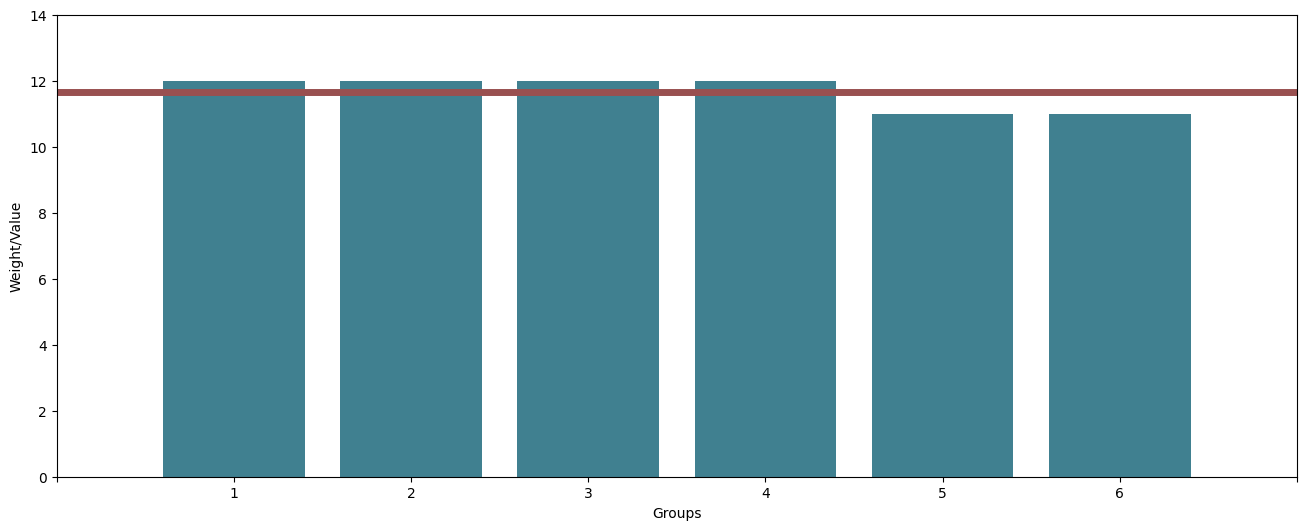

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (16,6))

# Plots
ax.bar(x = range(numberOfBins), height = groupValues, color="#408090")
ax.hlines(idealValue, -1, numberOfBins, colors="#995050", linewidths=5)

# Style
ax.set_xlim(-1,numberOfBins); ax.set_ylim(0,max(groupValues)+2)
ax.set_xticklabels(" 123456 ")
ax.set_xlabel("Groups")
ax.set_ylabel("Weight/Value")

plt.show()